In [ ]:
from google.colab import files
upload = files.upload()

Saving 2024_military_strength_by_country.xlsx to 2024_military_strength_by_country.xlsx


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and prepare data (adjust your path and sheet)
df = pd.read_excel("2024_military_strength_by_country.xlsx", sheet_name="2024_military_strength_by_count")

# Use pwr_index as the continuous target variable
df = df.dropna(subset=['pwr_index'])
df['target'] = (df['rank'] <= 50).astype(int)

non_feature_columns = ['country', 'country_code', 'capital_city', 'rank', 'pwr_index', 'target']
feature_columns = df.select_dtypes(include=['number']).columns.difference(non_feature_columns)

X = df[feature_columns].fillna(df[feature_columns].median())
y = df['pwr_index']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(f"  MSE      : {mean_squared_error(y_test, y_pred):.4f}")
    print(f"  R2 Score : {r2_score(y_test, y_pred):.4f}")



LinearRegression:
  MSE      : 1.3108
  R2 Score : -0.6287

Lasso:
  MSE      : 0.4894
  R2 Score : 0.3919

Ridge:
  MSE      : 0.5782
  R2 Score : 0.2816


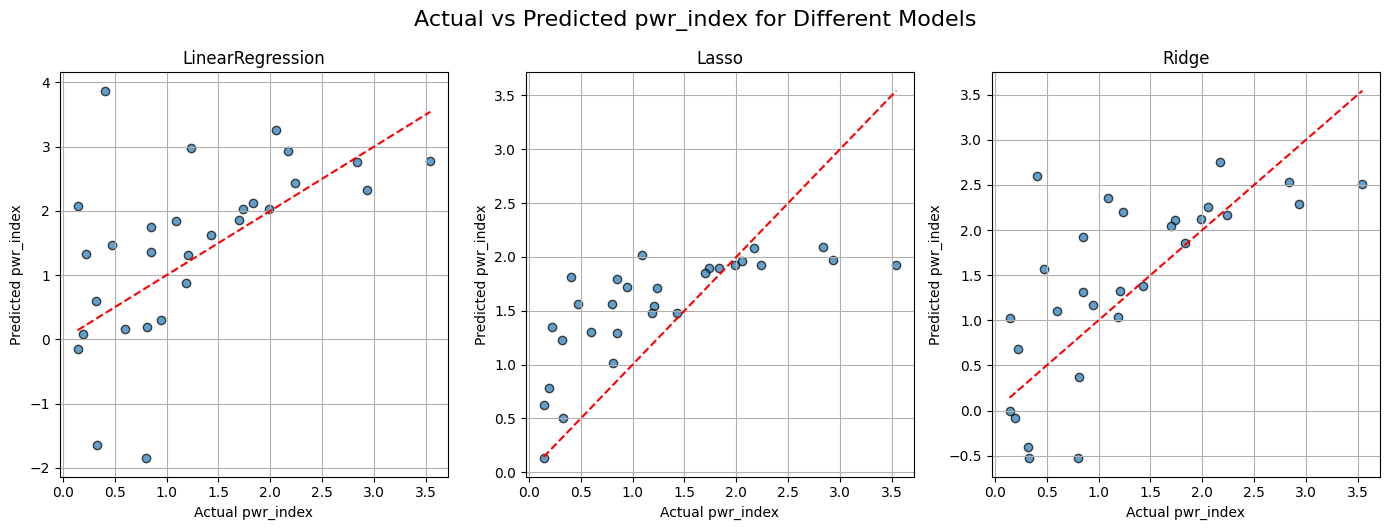

In [ ]:
import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(14, 5))

# Plot for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    # Subplot for each model
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
    plt.xlabel("Actual pwr_index")
    plt.ylabel("Predicted pwr_index")
    plt.title(f"{name}")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Actual vs Predicted pwr_index for Different Models", fontsize=16, y=1.05)
plt.show()


In [2]:
from google.colab import files
upload = files.upload()

Saving 2024_military_strength_by_country.xlsx to 2024_military_strength_by_country.xlsx


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
df = pd.read_excel("2024_military_strength_by_country.xlsx",
                   sheet_name="2024_military_strength_by_count")

# Remove missing target values
df = df.dropna(subset=['pwr_index'])

# Select features (drop non-numeric and unwanted columns)
non_feature_columns = ['country', 'country_code', 'capital_city', 'rank', 'pwr_index']
feature_columns = df.select_dtypes(include=['number']).columns.difference(non_feature_columns)

# Prepare X and y
X = df[feature_columns].fillna(df[feature_columns].median())
y = df['pwr_index']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train vanilla linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Vanilla Linear Regression Results:")
print(f"  MSE      : {mean_squared_error(y_test, y_pred):.4f}")
print(f"  R2 Score : {r2_score(y_test, y_pred):.4f}")


Vanilla Linear Regression Results:
  MSE      : 1.3108
  R2 Score : -0.6287
